## Desenvolvimento de um Modelo de Machine Learning

#### Importação da base de dados:
#### Análise dos Dados:
- Valores nulos ou faltantes: ✅
- Verificar Inconsistências: ✅
- Verificar Outliers: ✅
- Correlação dos Dados com a Classe: ✅
#### Preparação dos Dados:
- Escalonamento: ✅
- Padronização: ✅
- Undersampling ou Oversampling: ✅
- Selecionando as melhores Colunas: ✅
- Detecção de Colinearidade
#### Treinamento dos Algoritmos:
- Random Forest Classifier: ✅
- Logistic Regression: ✅
- Naive Bayes: ✅
- K-Nearest Neighbors (KNN) ✅
#### Otimização dos Modelos:
- GridSearch: ✅
- K-Cross Validation
#### Importação do MELHOR modelo:


### 1. Importação das Bibliotecas e do Dataframe

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [28]:
df_cancer = pd.read_csv("data/Lung Cancer Dataset.csv")
df_cancer

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,1
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,1
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,0
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,0


### 2. Análise dos Dados

In [473]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

- 0 means no
- 1 means yes

In [474]:
df_cancer['AGE'].describe()

count    5000.000000
mean       57.222800
std        15.799224
min        30.000000
25%        44.000000
50%        57.000000
75%        71.000000
max        84.000000
Name: AGE, dtype: float64

Column of Age has consistent datas: 
- age between 30 and 84; 
- Not null data or outliers;

In [475]:
df_cancer['GENDER'].describe()

count    5000.000000
mean        0.501200
std         0.500049
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: GENDER, dtype: float64

Column of Gender has consistent datas: 
- gender = 0 means man and 1 woman; 
- Not null data or outliers

In [476]:
df_cancer['SMOKING'].describe()

count    5000.000000
mean        0.666400
std         0.471546
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: SMOKING, dtype: float64

Column of Smoking has consistent datas: 
- Not null data or outliers;

In [477]:
df_cancer['FINGER_DISCOLORATION'].describe()

count    5000.0000
mean        0.6012
std         0.4897
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: FINGER_DISCOLORATION, dtype: float64

Column of Finger Discoloarion has consistent datas: 
- Not null data or outliers;

In [478]:
df_cancer['MENTAL_STRESS'].describe()

count    5000.000000
mean        0.539800
std         0.498463
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: MENTAL_STRESS, dtype: float64

Column of Finger Mental Stress has consistent datas: 
- Not null data or outliers;

In [479]:
df_cancer['EXPOSURE_TO_POLLUTION'].describe()

count    5000.000000
mean        0.516000
std         0.499794
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: EXPOSURE_TO_POLLUTION, dtype: float64

Column of Finger Exposure to Pollution has consistent datas: 
- Not null data or outliers;

In [480]:
df_cancer['ENERGY_LEVEL'].describe()

count    5000.000000
mean       55.032043
std         7.913083
min        23.258308
25%        49.440685
50%        55.050421
75%        60.323320
max        83.046971
Name: ENERGY_LEVEL, dtype: float64

Column of Energy Level to Pollution has consistent datas: 
- Not null data or outliers;

In [481]:
df_cancer['IMMUNE_WEAKNESS'].describe()

count    5000.000000
mean        0.394800
std         0.488857
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IMMUNE_WEAKNESS, dtype: float64

In [482]:
df_cancer['BREATHING_ISSUE'].describe()

count    5000.00000
mean        0.80040
std         0.39974
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: BREATHING_ISSUE, dtype: float64

In [483]:
df_cancer['ALCOHOL_CONSUMPTION'].describe()

count    5000.000000
mean        0.354200
std         0.478318
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ALCOHOL_CONSUMPTION, dtype: float64

In [484]:
df_cancer['THROAT_DISCOMFORT'].describe()

count    5000.000000
mean        0.698200
std         0.459085
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: THROAT_DISCOMFORT, dtype: float64

In [485]:
df_cancer['OXYGEN_SATURATION'].describe()

count    5000.000000
mean       94.991029
std         1.481048
min        89.923133
25%        93.973176
50%        94.974073
75%        95.989272
max        99.795786
Name: OXYGEN_SATURATION, dtype: float64

In [486]:
df_cancer['CHEST_TIGHTNESS'].describe()

count    5000.000000
mean        0.600600
std         0.489824
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: CHEST_TIGHTNESS, dtype: float64

In [487]:
df_cancer['FAMILY_HISTORY'].describe()

count    5000.000000
mean        0.301800
std         0.459085
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: FAMILY_HISTORY, dtype: float64

In [488]:
df_cancer['SMOKING_FAMILY_HISTORY'].describe()

count    5000.000000
mean        0.204000
std         0.403009
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SMOKING_FAMILY_HISTORY, dtype: float64

In [489]:
df_cancer['STRESS_IMMUNE'].describe()

count    5000.000000
mean        0.209600
std         0.407064
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: STRESS_IMMUNE, dtype: float64

In [490]:
df_cancer.groupby('PULMONARY_DISEASE').size()

PULMONARY_DISEASE
0    2963
1    2037
dtype: int64

#### 2.2- Encontrando correlação entre os dados:

- Uma vez que os valores das variáveis são distribuídas como se estivessem em uma tabela de contigentes, será utilizada o Coeficiente de Cramer's V para explicar a correlação entre os atributos previsores e as classes.

In [491]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    if min((kcorr - 1), (rcorr - 1)) <= 0:
        return 0
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def plot_cramers_v(df, size=35):
    num_cols = len(df.columns)
    cramers_v_matrix = np.zeros((num_cols, num_cols))

    # Calculate Cramér's V coefficient for each pair of columns
    for i in range(num_cols):
        for j in range(num_cols):
            if i == j:
                cramers_v_matrix[i, j] = 1.0  # Perfect correlation with itself
            else:
                cramers_v_matrix[i, j] = cramers_v(df.iloc[:, i], df.iloc[:, j])

    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(cramers_v_matrix, cmap='RdBu_r')

    # Add Cramér's V coefficient values as text
    for i in range(num_cols):
        for j in range(num_cols):
            text = ax.text(j, i, f'{cramers_v_matrix[i, j]:.2f}',
                           ha="center", va="center", color="black")

    plt.xticks(range(num_cols), df.columns, rotation=90)
    plt.yticks(range(num_cols), df.columns)

    fig.colorbar(im, ax=ax)
    plt.show()


<Axes: xlabel='AGE', ylabel='OXYGEN_SATURATION'>

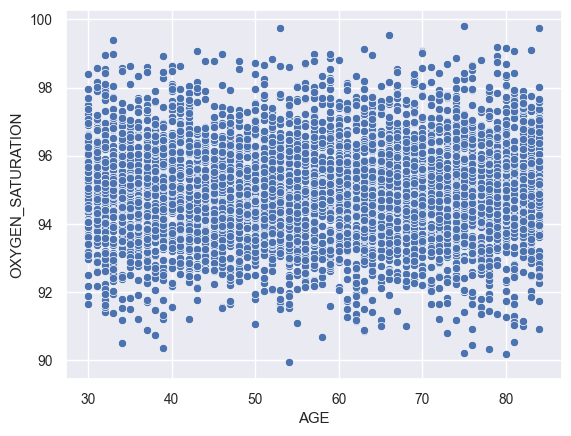

In [492]:
sn.scatterplot(x=df_cancer.loc[:, 'AGE'], y=df_cancer.loc[:, 'OXYGEN_SATURATION'])

- Correlação entre Age e Oxigen Saturation é fraca ou inexistente, uma vez que não há um padrão de linearieade

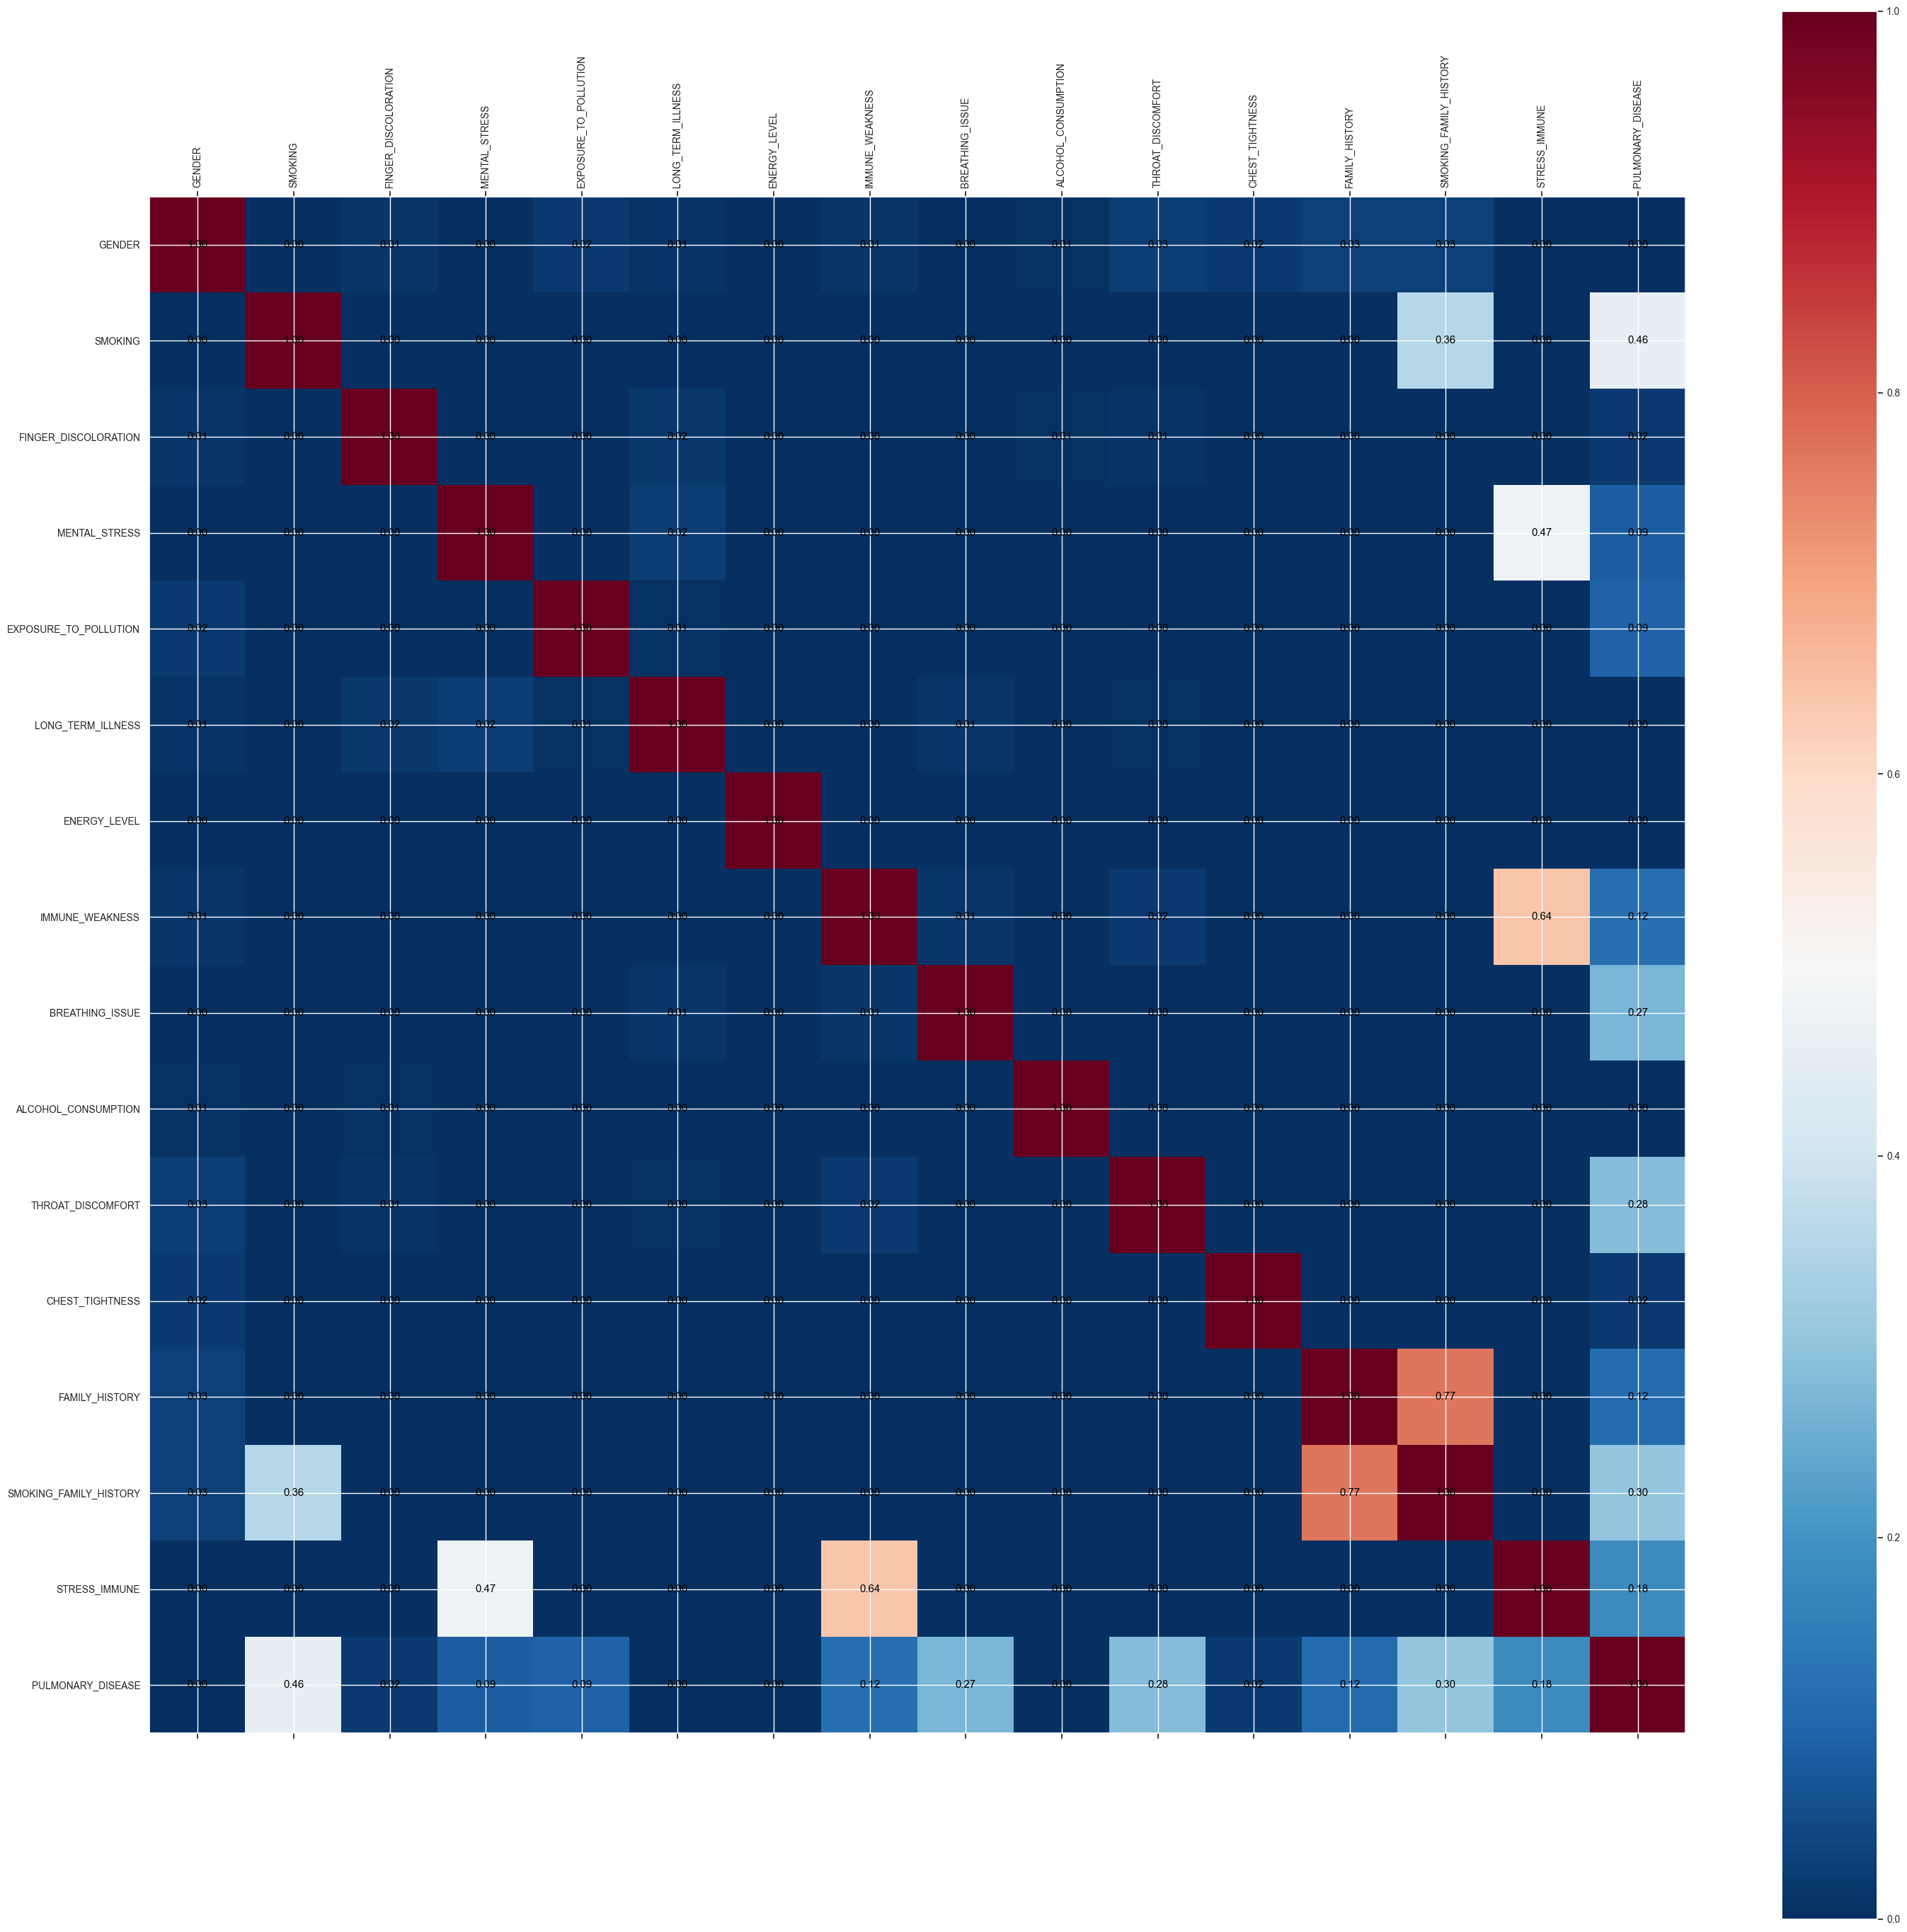

In [493]:
df_cancer_plot = df_cancer.drop(columns=['AGE', 'OXYGEN_SATURATION'])

plot_cramers_v(df_cancer_plot)

### 3. Preparação dos Dados

In [163]:
x_features = df_cancer.iloc[:, 0:17].values
y_class = df_cancer.iloc[:, 17].values

x_features, y_class

(array([[68.,  1.,  1., ...,  0.,  0.,  0.],
        [81.,  1.,  1., ...,  0.,  0.,  0.],
        [58.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [51.,  1.,  0., ...,  0.,  0.,  1.],
        [76.,  1.,  0., ...,  0.,  0.,  0.],
        [33.,  0.,  1., ...,  0.,  0.,  0.]], shape=(5000, 17)),
 array([0, 1, 0, ..., 0, 0, 0], shape=(5000,)))

In [164]:
type(x_features)

numpy.ndarray

#### Treinando com todas os Atributos

In [165]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [166]:
encoder = MinMaxScaler(feature_range=(-1, 1))

x_features[:, 0] = encoder.fit_transform(x_features[:, 0].reshape(-1, 1)).flatten()
x_features[:, 7] = encoder.fit_transform(x_features[:, 7].reshape(-1, 1)).flatten()
x_features[:, 12] = encoder.fit_transform(x_features[:, 12].reshape(-1, 1)).flatten()



In [167]:
x_features[0]

array([0.40740741, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.15650251, 0.        , 0.        ,
       1.        , 1.        , 0.22644925, 1.        , 0.        ,
       0.        , 0.        ])

In [168]:
standard = StandardScaler()
x_features = standard.fit_transform(x_features)
x_features

array([[ 0.68220299,  0.99760287,  0.70753109, ..., -0.65746055,
        -0.50624244, -0.51495843],
       [ 1.5051105 ,  0.99760287,  0.70753109, ..., -0.65746055,
        -0.50624244, -0.51495843],
       [ 0.04919721,  0.99760287,  0.70753109, ..., -0.65746055,
        -0.50624244, -0.51495843],
       ...,
       [-0.39390683,  0.99760287, -1.41336546, ..., -0.65746055,
        -0.50624244,  1.94190431],
       [ 1.18860761,  0.99760287, -1.41336546, ..., -0.65746055,
        -0.50624244, -0.51495843],
       [-1.53331723, -1.00240289,  0.70753109, ..., -0.65746055,
        -0.50624244, -0.51495843]], shape=(5000, 17))

In [169]:
x_features, y_class

(array([[ 0.68220299,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [ 1.5051105 ,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [ 0.04919721,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        ...,
        [-0.39390683,  0.99760287, -1.41336546, ..., -0.65746055,
         -0.50624244,  1.94190431],
        [ 1.18860761,  0.99760287, -1.41336546, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [-1.53331723, -1.00240289,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843]], shape=(5000, 17)),
 array([0, 1, 0, ..., 0, 0, 0], shape=(5000,)))

In [170]:
over_features = SMOTE(sampling_strategy='all')
x_features, y_class = over_features.fit_resample(x_features, y_class)

In [171]:
x_features, y_class

(array([[ 0.68220299,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [ 1.5051105 ,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [ 0.04919721,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        ...,
        [-0.42899563,  0.99760287,  0.70753109, ...,  1.52100382,
          1.97533814, -0.51495843],
        [-0.78067402,  0.99760287,  0.70753109, ..., -0.65746055,
         -0.50624244, -0.51495843],
        [-0.89640177, -1.00240289,  0.70753109, ..., -0.65746055,
         -0.50624244,  1.94190431]], shape=(5926, 17)),
 array([0, 1, 0, ..., 1, 1, 1], shape=(5926,)))

In [172]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.25)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4444, 17), (4444,), (1482, 17), (1482,))

### 4. Treinamento dos Modelos:

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

In [175]:
model_naive = GaussianNB()
model_naive.fit(x_train, y_train)
predict_naive = model_naive.predict(x_test)

'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40

In [176]:
model_random = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=0)
model_random.fit(x_train, y_train)
predict_random = model_random.predict(x_test)

In [177]:
model_logistic = LogisticRegressionCV(penalty='l2', max_iter=100, class_weight=None, solver='liblinear')
model_logistic.fit(x_train, y_train)
predict_logistic = model_logistic.predict(x_test)

In [178]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
predict_KNN = model_KNN.predict(x_test)

### 5. Otimização dos Modelos:

In [179]:
def PerformanceMetrics(y_true, predict, class_name):
    import matplotlib.pyplot as plt
    import seaborn as sn
    from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
    

    # Imprime Matriz de Confusão:
    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9)
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)


    # Imprime a Acurácia:
    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    
    # Imprime Gráfico da Curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
    
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    print(classification_report(y_true, predict))

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.44%.
O modelo identificou corretamente 638 registros com o rótulo 'NO'.
O modelo identificou corretamente 643 registros com o rótulo 'YES'.


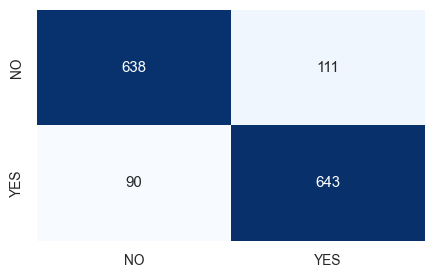

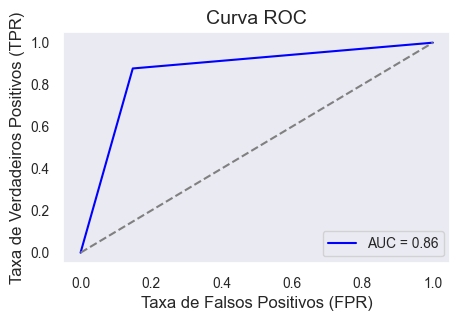

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       749
           1       0.85      0.88      0.86       733

    accuracy                           0.86      1482
   macro avg       0.86      0.86      0.86      1482
weighted avg       0.86      0.86      0.86      1482



In [180]:
PerformanceMetrics(y_test, predict_naive, ['NO', 'YES'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 91.97%.
O modelo identificou corretamente 700 registros com o rótulo 'NO'.
O modelo identificou corretamente 663 registros com o rótulo 'YES'.


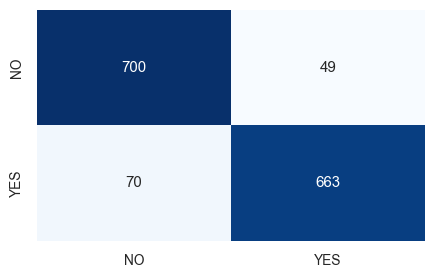

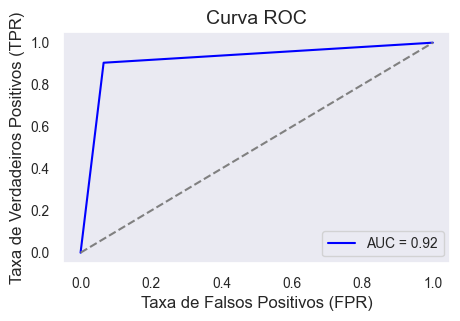

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       749
           1       0.93      0.90      0.92       733

    accuracy                           0.92      1482
   macro avg       0.92      0.92      0.92      1482
weighted avg       0.92      0.92      0.92      1482



In [181]:
PerformanceMetrics(y_test, predict_random, ['NO', 'YES'])

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 90.22%.
O modelo identificou corretamente 664 registros com o rótulo 'NO'.
O modelo identificou corretamente 673 registros com o rótulo 'YES'.


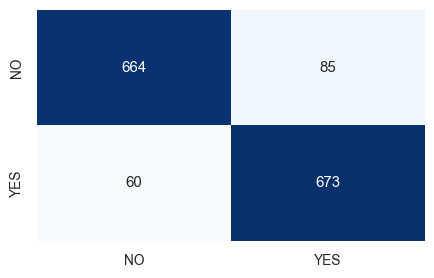

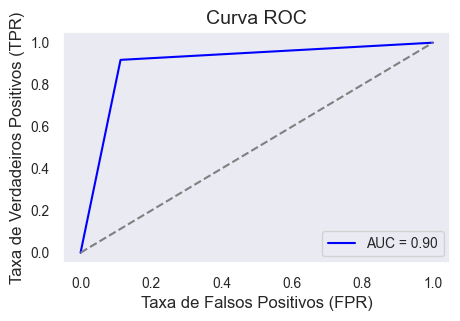

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       749
           1       0.89      0.92      0.90       733

    accuracy                           0.90      1482
   macro avg       0.90      0.90      0.90      1482
weighted avg       0.90      0.90      0.90      1482



In [182]:
PerformanceMetrics(y_test, predict_logistic, ['NO', 'YES'])

In [47]:
from sklearn.model_selection import GridSearchCV

In [183]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(param_grid=param_grid, estimator=RandomForestClassifier(), cv=5)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

np.float64(0.9196788125884974)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

param_grid = {
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [100],
    'class_weight': [None]
}

grid_search = GridSearchCV(param_grid=param_grid, estimator=LogisticRegressionCV(Cs=np.logspace(-3, 0, 4)))
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

np.float64(0.8840719789954534)

### Importando o Modelo:

- Melhor Algoritmo: **Random Forest**

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 92.98%.
O modelo identificou corretamente 708 registros com o rótulo 'NO'.
O modelo identificou corretamente 670 registros com o rótulo 'YES'.


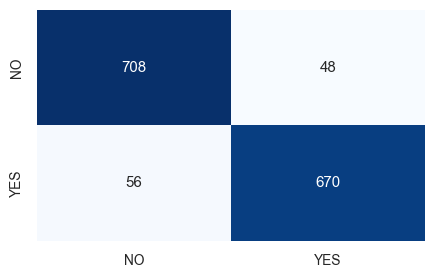

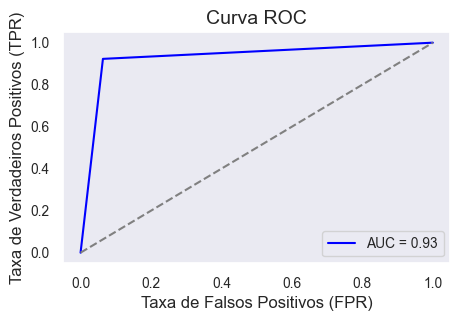

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       756
           1       0.93      0.92      0.93       726

    accuracy                           0.93      1482
   macro avg       0.93      0.93      0.93      1482
weighted avg       0.93      0.93      0.93      1482



In [131]:
PerformanceMetrics(y_test, predict_random, ['NO', 'YES'])

In [ ]:
import joblib

joblib.dump(model_random, "model_random.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(standard, "standard.pkl")

['standard.pkl']

In [14]:
def pre_processing(record):
    import numpy as np
    import joblib
    record = np.array(record).reshape(1, -1)

    standard = joblib.load("model/standard.pkl")
    encoder = joblib.load("model/encoder.pkl")
    
    record[:, 0] = encoder.transform(record[:, 0].reshape(-1, 1)).flatten()
    record[:, 7] = encoder.transform(record[:, 7].reshape(-1, 1)).flatten()
    record[:, 12] = encoder.transform(record[:, 12].reshape(-1, 1)).flatten()

    record = standard.transform(record)

    return record

def predict(record_preprocessing):
    import numpy as np
    import joblib

    model = joblib.load("model/model_random.pkl")

    record_preprocessing = np.array(record_preprocessing).reshape(1, -1)

    return model.predict(record_preprocessing), model.predict_proba(record_preprocessing)


- AGE: Idade do paciente.
- GENDER: Gênero (1 para masculino, 0 para feminino).
- SMOKING: Fumante (1 para sim, 0 para não).
- FINGER_DISCOLORATION: Descoloração dos dedos (1 para sim, 0 para não).
- MENTAL_STRESS: Estresse mental (1 para sim, 0 para não).
- EXPOSURE_TO_POLLUTION: Exposição à poluição (1 para sim, 0 para não).
- LONG_TERM_ILLNESS: Doença de longo prazo (1 para sim, 0 para não).
- ENERGY_LEVEL: Nível de energia (valor numérico).
- IMMUNE_WEAKNESS: Fraqueza imunológica (1 para sim, 0 para não).
- BREATHING_ISSUE: Problemas respiratórios (1 para sim, 0 para não).
- ALCOHOL_CONSUMPTION: Consumo de álcool (1 para sim, 0 para não).
- THROAT_DISCOMFORT: Desconforto na garganta (1 para sim, 0 para não).
- OXYGEN_SATURATION: Saturação de oxigênio (valor numérico).
- CHEST_TIGHTNESS: Aperto no peito (1 para sim, 0 para não).
- FAMILY_HISTORY: Histórico familiar (1 para sim, 0 para não).
- SMOKING_FAMILY_HISTORY: Histórico familiar de tabagismo (1 para sim, 0 para não).
- STRESS_IMMUNE: Estresse imunológico (1 para sim, 0 para não).
- PULMONARY_DISEASE: Doença pulmonar (1 para sim, 0 para não).

In [15]:
record = pre_processing([50,1,0,0,0,0,0,60.0,0,0,0,0,99.0,0,0,0,0])
type(record)

numpy.ndarray

In [16]:
predict = predict(record)
predict

(array([0]), array([[0.83333333, 0.16666667]]))